In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import ast
from matplotlib import pyplot as plt
import seaborn as sns


dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_da_fr = df[(df["job_title_short"]== "Data Analyst") & (df["job_country"] == "France")].copy()

In [3]:
df_da_fr = df_da_fr.dropna(subset=["salary_year_avg"])
df_da_fr_exploded = df_da_fr.explode("job_skills")
df_da_fr_exploded[["salary_year_avg", "job_skills"]].head(5)

,salary_year_avg,job_skills
12526,111175.0,power bi
12526,111175.0,sharepoint
12526,111175.0,excel
33317,56700.0,scala
33317,56700.0,sql


In [4]:
df_da_fr_skills = df_da_fr_exploded.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="count",ascending=False)
df_da_fr_skills = df_da_fr_skills.rename(columns={"count":"skills_count","median":"median_salary"})
df_da_fr_skills

,skills_count,median_salary
job_skills,,
sql,28,89100.0
python,20,94800.0
tableau,18,57100.0
azure,9,80850.0
power bi,8,92925.0
excel,8,96012.5
airflow,5,57500.0
aws,5,89100.0
snowflake,5,89100.0


In [5]:
da_fr_job_count = len(df_da_fr)
df_da_fr_skills["skill_percent"] = df_da_fr_skills["skills_count"] / da_fr_job_count * 100
df_da_fr_skills

,skills_count,median_salary,skill_percent
job_skills,,,
sql,28,89100.0,56.0
python,20,94800.0,40.0
tableau,18,57100.0,36.0
azure,9,80850.0,18.0
power bi,8,92925.0,16.0
excel,8,96012.5,16.0
airflow,5,57500.0,10.0
aws,5,89100.0,10.0
snowflake,5,89100.0,10.0


In [6]:
skill_percent = 5
df_da_fr_skills_high_demand = df_da_fr_skills[df_da_fr_skills["skill_percent"] > skill_percent]
df_da_fr_skills_high_demand

,skills_count,median_salary,skill_percent
job_skills,,,
sql,28,89100.0,56.0
python,20,94800.0,40.0
tableau,18,57100.0,36.0
azure,9,80850.0,18.0
power bi,8,92925.0,16.0
excel,8,96012.5,16.0
airflow,5,57500.0,10.0
aws,5,89100.0,10.0
snowflake,5,89100.0,10.0


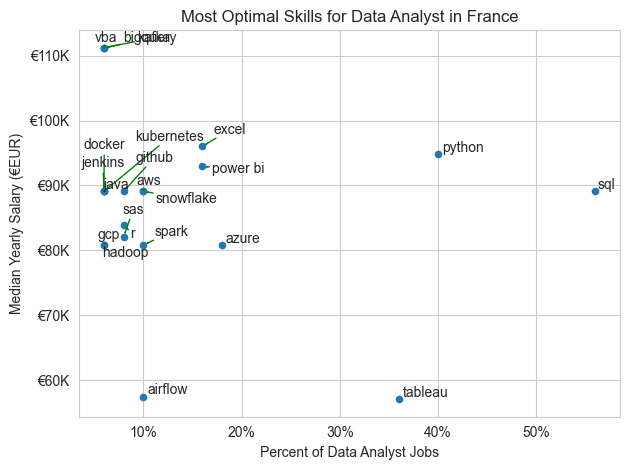

In [12]:
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text

df_da_fr_skills_high_demand.plot(kind="scatter", x="skill_percent", y="median_salary")
texts = []
for i, txt in enumerate(df_da_fr_skills_high_demand.index):
    texts.append(plt.text(df_da_fr_skills_high_demand["skill_percent"].iloc[i], df_da_fr_skills_high_demand["median_salary"].iloc[i], txt))
    
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="green", lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"€{int(y/1000)}K"))
    
plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Yearly Salary (€EUR)")
plt.title("Most Optimal Skills for Data Analyst in France")

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"€{int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()    
plt.show()

In [13]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['outlook',
  'msaccess',
  'dax',
  'visio',
  'ssis',
  'sas',
  'splunk',
  'tableau',
  'ssrs',
  'microstrategy',
  'cognos',
  'sharepoint',
  'esquisse',
  'alteryx',
  'sheets',
  'spreadsheet',
  'nuix',
  'sap',
  'qlik',
  'powerpoint',
  'datarobot',
  'looker',
  'spss',
  'power bi',
  'ms access',
  'excel',
  'word',
  'powerbi'],
 'programming': ['bash',
  'vb.net',
  'f#',
  'erlang',
  'vba',
  'javascript',
  'assembly',
  'sas',
  'mongodb',
  'python',
  'c++',
  'no-sql',
  'nosql',
  'crystal',
  'objective-c',
  'java',
  'rust',
  'visualbasic',
  'scala',
  'php',
  'dart',
  'pascal',
  'lua',
  'shell',
  'fortran',
  'css',
  'powershell',
  'ruby',
  'perl',
  'julia',
  'golang',
  'r',
  'apl',
  'elixir',
  'delphi',
  'haskell',
  'solidity',
  'c#',
  'typescript',
  'matlab',
  'lisp',
  'sql',
  'visual basic',
  'cobol',
  'mongo',
  'groovy',
  'c',
  't-sql',
  'go',
  'clojure',
  'ocaml',
  'swift',
  'html',
  'kotlin',
  's

In [14]:
df_technology = pd.DataFrame(list(technology_dict.items()),columns=["technology","skills"])
df_technology = df_technology.explode("skills")
df_technology

,technology,skills
0,analyst_tools,outlook
0,analyst_tools,msaccess
0,analyst_tools,dax
0,analyst_tools,visio
0,analyst_tools,ssis
...,...,...
9,sync,mattermost
9,sync,wire
9,sync,rocketchat
9,sync,webex


In [17]:
df_plot = df_da_fr_skills_high_demand.merge(df_technology, left_on="job_skills", right_on="skills")

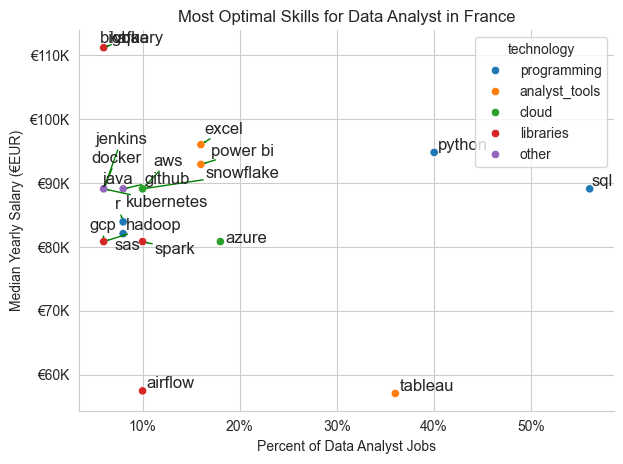

In [19]:

sns.scatterplot(
    data=df_plot,
    x="skill_percent",
    y="median_salary",
    hue="technology",
)

sns.despine()
sns.set_theme(style="ticks")


texts = []
for i, txt in enumerate(df_da_fr_skills_high_demand.index):
    texts.append(plt.text(df_da_fr_skills_high_demand["skill_percent"].iloc[i], df_da_fr_skills_high_demand["median_salary"].iloc[i], txt))
    
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="green", lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"€{int(y/1000)}K"))
    
plt.xlabel("Percent of Data Analyst Jobs")
plt.ylabel("Median Yearly Salary (€EUR)")
plt.title("Most Optimal Skills for Data Analyst in France")

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"€{int(y/1000)}K"))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()    
plt.show()